In [22]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import ode
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from mpl_toolkits import axes_grid1

In [23]:
a= 5
b= 500
xx = np.linspace(-a, a, b)
yy = np.linspace(-a, a, b)
mX, mY = np.meshgrid(xx,yy)

In [26]:
r1=np.array([2/np.sqrt(3),1])   # f is direction of the force
f=np.array([0,1])                         # r is position of the force red arrow - touchdown point                               # direction of the force

'''def stokeslet(f,r0,mX,mY):
    Id=np.array([[1,0],[0,1]])
    r=np.array([mX-r0[0],mY-r0[1]])

    Idf=np.dot(Id,f) 
    print(np.shape(Idf))
    print(np.shape(f[:,np.newaxis,np.newaxis]))
    rTf=(r*f[:,np.newaxis,np.newaxis]).sum(axis=0)
    rrTf=(r*rTf[np.newaxis,])
    print(np.shape(rrTf))
    modr=(r[0]**2+r[1]**2)**.5
    
    u,v=Idf[:,np.newaxis,np.newaxis]/modr+rrTf/modr**3.
    return [u,v]'''

e = np.array([0,1])
d = np.array([1,0])



def stokeslet(f, r0, mX, mY, e,d):
    
    r = np.array([mX-r0[0],mY-r0[1]])
    
    
    
    modr=(r[0]**2+r[1]**2)**.5
    
    jeden = ((d[0]*r[0]+ d[1]*r[1])*e[:, np.newaxis, np.newaxis] - (e[0]*r[0]+e[1]*r[1])*d[:, np.newaxis, np.newaxis] )/modr**3
    dwa =  -((d[0]*e[0]+d[1]*e[1])*r)/modr**3
    trzy = 3*((e[0]*r[0]+e[1]*r[1])*(d[0]*r[0]+ d[1]*r[1])*r)/modr**5
    
    u,v = trzy+jeden+dwa
    return [u,v]
        

def sym1(f, r0, mX, mY):
    e = np.array([0,1])
    d = np.array([1,0])
    
    r = np.array([mX-r0[0],mY-r0[1]])
    modr=(r[0]**2+r[1]**2)**.5
    
    dwa = -((d[0]*e[0]+d[1]*e[1])*r)/modr**3
    
    u,v = dwa
    return [u,v]
    
def sym2(f, r0, mX, mY):
    e = np.array([0,1])
    d = np.array([1,0])
    
    r = np.array([mX-r0[0],mY-r0[1]])

    
    modr=(r[0]**2+r[1]**2)**.5
    
    trzy = 3*((e[0]*r[0]+e[1]*r[1])*(d[0]*r[0]+ d[1]*r[1])*r)/modr**5
    
    u,v = trzy
    return [u,v]
    

def asym(f, r0, mX, mY):
    e = np.array([0,1])
    d = np.array([1,0])
    
    r = np.array([mX-r0[0],mY-r0[1]])
    
    modr=(r[0]**2+r[1]**2)**.5
    
    jeden = ((d[0]*r[0]+ d[1]*r[1])*e[:, np.newaxis, np.newaxis] - (e[0]*r[0]+e[1]*r[1])*d[:, np.newaxis, np.newaxis] )/modr**3
    
    u,v = jeden
    return [u,v]



r1=np.array([0,-0.5])

u1,v1=stokeslet(f, r1,mX,mY,e,d)

ua, va = asym(f, r1,mX,mY)

us1, vs1 = sym1(f, r1,mX,mY)
us2, vs2 = sym2(f, r1,mX,mY)

u= us1+us2
v= vs1+vs2


def B_dir(t,p,fx,fz):
    ex = fx(p[0],p[1])
    ez = fz(p[0],p[1])
    n = (ex**2.0+ez**2.0)**0.5
    return [ex/n, ez/n]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.         0.22727273 0.45454545 0.68181818 0.90909091 1.13636364
 1.36363636 1.59090909 1.81818182 2.04545455 2.27272727 2.5
 2.72727273 2.95454545 3.18181818 3.40909091 3.63636364 3.86363636
 4.09090909 4.31818182 4.54545455 4.77272727]


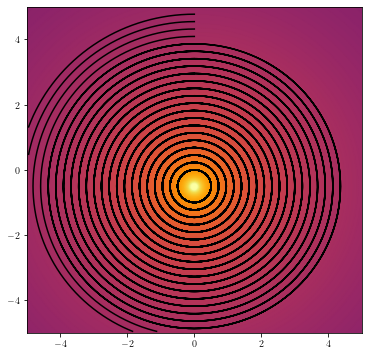

In [25]:
fig=plt.figure(figsize=(6,6),facecolor="w")
ax = plt.axes()
plt.rcParams['text.usetex'] = True


Z = np.sqrt(va**2+ua**2)

plt.pcolormesh(mX, mY, Z,
                  norm=colors.LogNorm(vmin= 10**(-4), vmax=10**2),
               snap=True,
                   cmap=plt.cm.inferno, rasterized=True, 
              shading='gouraud')

#plt.streamplot(mX,mY,ua,va, broken_streamlines=False)
# set the starting point of the magnetic field line

#xstart = np.linspace(0, 0, 14)
#additional = np.linspace(-0.99*a, 0.99*a, 8)
ystart = np.zeros(22)
xstart = np.zeros(22)

#for i in additional:
 #   xstart = np.append(xstart, -i)
k=0

for i in range(0, 22):
    
    #if i<11:
        ystart[i]=k*(5/22)
        #print(k)
        
        k=k+1
        
    #if i>=11:
        #ystart[i]=-k*(5/22)
        #print(-k/14)
        #k=k+1


places=np.vstack([xstart,ystart]).T
# interpolate function of the Bx and Bz as functions of (x,z) position
fbx = interpolate.interp2d(xx,yy,ua)
fbz = interpolate.interp2d(xx,yy,va)

R=0.001
dt=0.8*R

# plot area
x0, x1= -0.99*a, 0.99*a
y0, y1= -0.99*a, 0.99*a 

#set the ode function
r=ode(B_dir)
r.set_integrator('vode')
r.set_f_params(fbx,fbz)

xs,ys = [],[]
for p in places:
    x=[p[0]] 
    y=[p[1]]
    r.set_initial_value([p[0], p[1]], 0)
    while r.successful():
        r.integrate(r.t+dt)
        x.append(r.y[0])
        y.append(r.y[1])
        hit_electrode=False
        if len(y) > 100000:
            break
        #check if field line left drwaing area
        if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
            break
    xs.append(x)
    ys.append(y)
    
for x,y in zip(xs,ys):
    ax.plot(x,y, color="k" , zorder=10)

print(xstart, ystart)
plt.savefig('okrąg.pdf', bbox_inches='tight', pad_inches=0, dpi=400)

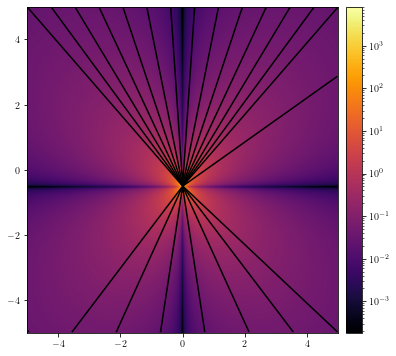

In [27]:
fig=plt.figure(figsize=(6,6),facecolor="w")
ax = plt.axes()
plt.rcParams['text.usetex'] = True


Z = np.sqrt(v**2+u**2)
image = ax.pcolormesh(mX, mY, Z,
                #norm=colors.LogNorm(vmin= 10**(-4), vmax=10**2),    
                norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), 
                      snap=True,
               cmap=plt.cm.inferno, rasterized=True, 
               shading='gouraud', zorder=0)


def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)


add_colorbar(image)

xstart = np.linspace(-0.99*a, 0.99*a, 14)
additional = np.linspace(-0.99*a, 0.99*a, 8)
ystart = np.zeros(22)
for i in additional:
    xstart = np.append(xstart, -i)

for i in range(0, 22):
    if i<14:
        ystart[i]=0.99*a
    if i>=14:
        ystart[i]=-0.99*a


places=np.vstack([xstart,ystart]).T

fbx = interpolate.interp2d(xx,yy,u)
fbz = interpolate.interp2d(xx,yy,v)

R=0.001
dt=0.8*R

# plot area
x0, x1= -0.99*a, 0.99*a
y0, y1= -0.99*a, 0.99*a

#set the ode function
r=ode(B_dir)
r.set_integrator('vode')
r.set_f_params(fbx,fbz)

xs,ys = [],[]
for p in places:
    x=[p[0]] 
    y=[p[1]]
    r.set_initial_value([p[0], p[1]], 0)
    while r.successful():
        r.integrate(r.t+dt)
        x.append(r.y[0])
        y.append(r.y[1])
        hit_electrode=False
        if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
            break
    xs.append(x)
    ys.append(y)
    
for x,y in zip(xs,ys):
    ax.plot(x,y, color="k" , zorder=10)




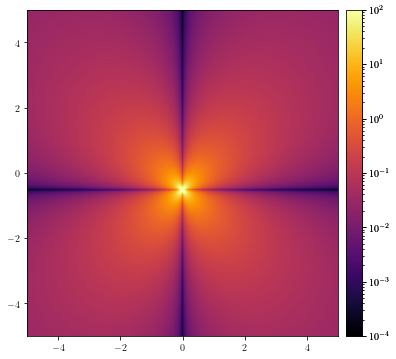

In [6]:
fig=plt.figure(figsize=(6,6),facecolor="w")
ax = plt.axes()
plt.rcParams['text.usetex'] = True


Z = np.sqrt(vs2**2+us2**2)
image = ax.pcolormesh(mX, mY, Z,
                norm=colors.LogNorm(vmin= 10**(-4), vmax=10**2),    
                #norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), 
                      snap=True,
               cmap=plt.cm.inferno, rasterized=True, 
               shading='gouraud', zorder=0)


def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

#ax.set_title(r'$\displaystyle\\v(r)='
 #           r'\frac{2d \mathbf{F}}{8 \pi  \eta r^3 } \left( 3 \left( \frac{r_x}{r}\right)^2 - \mathds{1}\right) \mathbf{r}$', fontsize=16, color='k')
add_colorbar(image)
add_colorbar(image)

#use dpi=4000 to make everything 'in shape'... but it lasts ages





NameError: name 'vs' is not defined

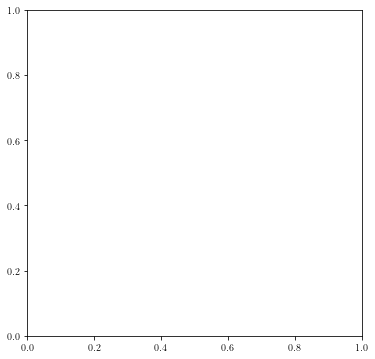

In [7]:
fig=plt.figure(figsize=(6,6),facecolor="w")
ax = plt.axes()
plt.rcParams['text.usetex'] = True


Z = np.sqrt(vs**2+us**2)
image = ax.pcolormesh(mX, mY, Z,
                norm=colors.LogNorm(vmin= 10**(-4), vmax=10**2),    
                #norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), 
                      snap=True,
               cmap=plt.cm.inferno, rasterized=True, 
               shading='gouraud', zorder=0)


def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

#ax.set_title(r'$\displaystyle\\v(r)='
 #           r'\frac{2d \mathbf{F}}{8 \pi  \eta r^3 } \left( 3 \left( \frac{r_x}{r}\right)^2 - \mathds{1}\right) \mathbf{r}$', fontsize=16, color='k')
add_colorbar(image)
add_colorbar(image)

#use dpi=4000 to make everything 'in shape'... but it lasts ages




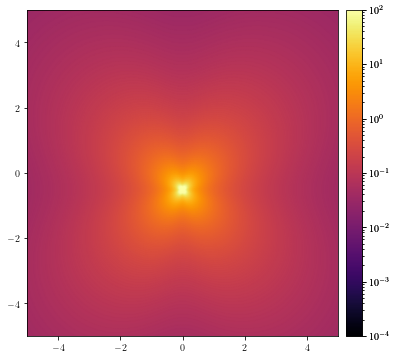

In [8]:
fig=plt.figure(figsize=(6,6),facecolor="w")
ax = plt.axes()
plt.rcParams['text.usetex'] = True
v1, u1 = stokeslet(f, r1, mX, mY, e,d)

Z = np.sqrt(v1**2+u1**2)
image = ax.pcolormesh(mX, mY, Z,
                norm=colors.LogNorm(vmin= 10**(-4), vmax=10**2),    
                #norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), 
                      snap=True,
               cmap=plt.cm.inferno, rasterized=True, 
               shading='gouraud', zorder=0)


def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

#ax.set_title(r'$\displaystyle\\v(r)='
 #           r'\frac{2d \mathbf{F}}{8 \pi  \eta r^3 } \left( 3 \left( \frac{r_x}{r}\right)^2 - \mathds{1}\right) \mathbf{r}$', fontsize=16, color='k')
add_colorbar(image)
add_colorbar(image)

#use dpi=4000 to make everything 'in shape'... but it lasts ages


